In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
warnings.filterwarnings("ignore")

In [62]:
df=pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [63]:
df.info()
df.isnull().any().any() # Returns True is there is any null value in dataset, Here it is False.
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4081,3735.0,1.442735,-0.615451,-0.891079,-1.633736,1.479398,3.267038,-1.198806,0.715915,0.362632,...,-0.291091,-0.886952,0.100126,0.918922,0.364895,-0.506097,-0.015882,0.011710,20.54,0
64602,51221.0,-0.696562,1.341379,1.485132,1.897358,0.475377,-0.323015,0.800568,0.000569,-0.717263,...,-0.014729,0.085753,-0.152865,0.306942,-0.070995,-0.121399,0.012779,0.156221,7.60,0
259116,158965.0,2.075510,0.753957,-3.030008,0.789103,1.163779,-1.758843,0.867675,-0.524649,-0.110271,...,-0.031989,0.154722,0.000402,0.936907,0.362391,0.659139,-0.073277,-0.008177,0.76,0
17482,28758.0,-0.901804,0.182260,1.337870,-0.589233,1.179772,-1.071955,0.871792,-0.170738,-0.626508,...,-0.278413,-1.045063,0.011874,-0.053671,-0.118489,-0.025853,-0.198291,-0.131406,19.90,0
212755,138983.0,1.998560,-0.081655,-0.706772,0.633569,-0.646562,-1.742649,0.152705,-0.349267,0.594862,...,-0.239182,-0.596794,0.459434,0.910377,-0.443125,0.143115,-0.074542,-0.052480,1.98,0


In [64]:
df.Class.value_counts()
 #  0    284315
 # 1       492
df.Class.value_counts(normalize=True) #  0    0.998273 - % of real transaction
                                      #  1    0.001727 - % of fraud transaction
# Number of fraudulent transactions is just 0.001 which makes the data highly unbalanced

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [69]:
#Scaling Time and Amounts 
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [26]:
# Data Partition

In [72]:
X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [74]:
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Text(0.5, 1.0, 'Transaction Times')

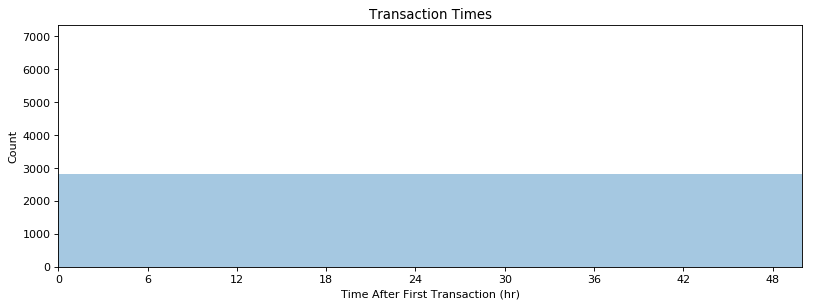

In [38]:
%matplotlib inline
#Exploratory Data Analysis

#X_train.Time.describe()

# Plot transaction time
plt.figure(figsize=(12,4), dpi=80)
sb.distplot(X_train.Time, bins=48, kde=False)
plt.xlim([0,50])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')
# the two heaps shows that maximum transactions have happened during the night time.


Text(0.5, 1.0, 'Transaction Amount')

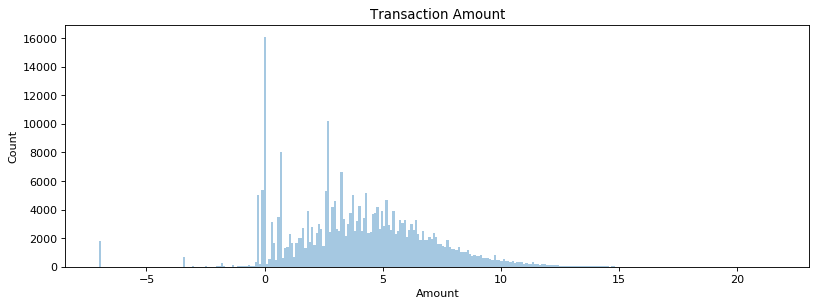

In [40]:
df.Amount.describe()# right Skewed
plt.figure(figsize=(12,4), dpi=80)
sb.distplot(df.Amount, bins=300, kde=False)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Transaction Amount')

0.11535790843348774

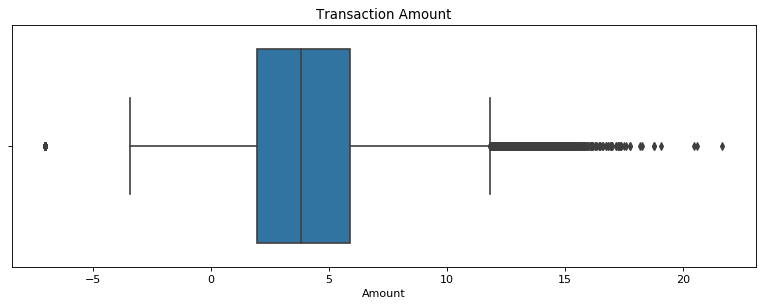

In [42]:
plt.figure(figsize=(12,4), dpi=80)
sb.boxplot(x=df.Amount)
plt.title('Transaction Amount')

df.Amount.skew()

Text(0.5, 1.0, 'V1-V28 Standar Deviations')

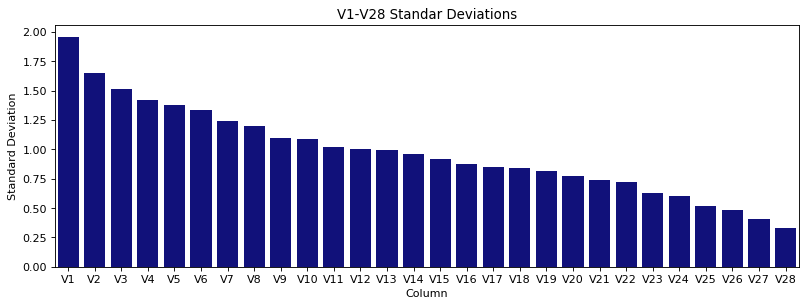

In [75]:
# plot the standard deviation
plt.figure(figsize=(12,4), dpi=80)
sb.barplot(x=PCA_vars, y=df[PCA_vars].std(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standar Deviations')
#All the PC's has roughly unit variance and it starts from ~0.3 till 1.9


Text(0.5, 1.0, 'V1-V28 Skewness')

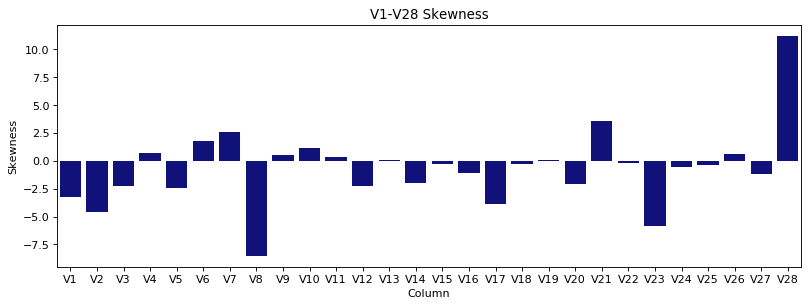

In [47]:
# plot the skewness

plt.figure(figsize=(12,4), dpi=80)
sb.barplot(x=PCA_vars, y=df[PCA_vars].skew(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewness')
# few PC's are skewed, so lets plot the histogram for those skewed PC's


Text(0.5, 1.0, 'V8')

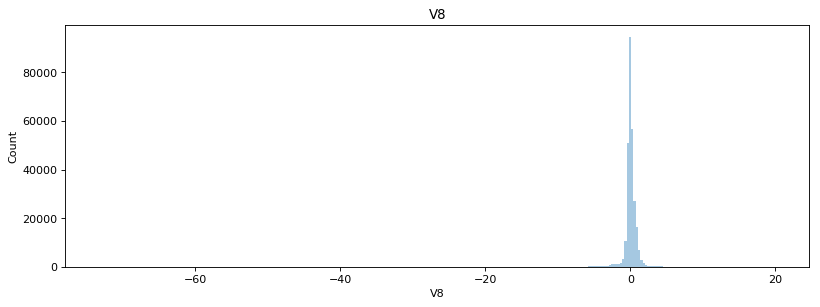

In [48]:
plt.figure(figsize=(12,4), dpi=80)
sb.distplot(df['V8'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('V8')
# Histogram is not showing any Outlier so plot the scatter plot

Text(0.5, 1.0, 'V8')

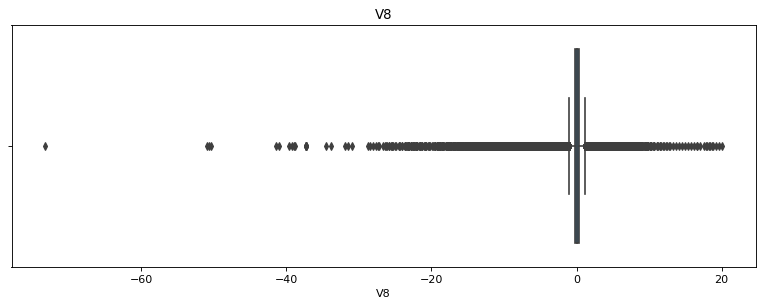

In [49]:
plt.figure(figsize=(12,4), dpi=80)
sb.boxplot(df['V8'])
plt.title('V8')
#There are large number of outliers, which indicates high kurtosis in V8 and i think i should plot the kutosis of each PC's
# lets take the log scale on Kurtosis


Text(0.5, 1.0, 'V1-V28 Kurtoses')

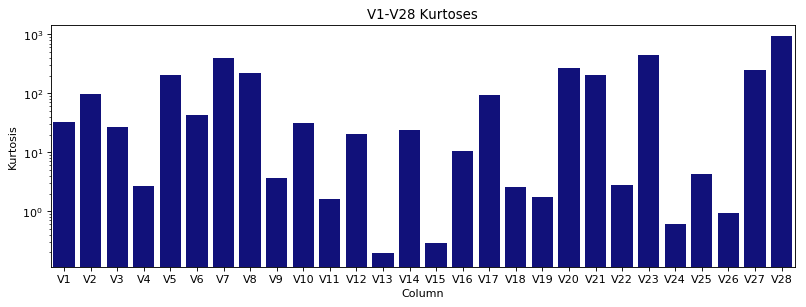

In [50]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sb.barplot(x=PCA_vars, y=df[PCA_vars].kurtosis(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

Text(0.5, 1.0, 'V1-V28 Medians')

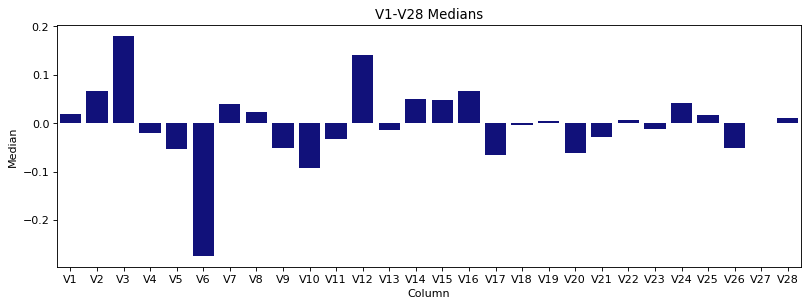

In [51]:
# As many of the PCA variables are heavy-tailed, so let's plot the median

plt.figure(figsize=(12,4), dpi=80)
sb.barplot(x=PCA_vars, y=df[PCA_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')
# median also looks zero


Text(0.5, 1.0, 'V1-V28 IQR')

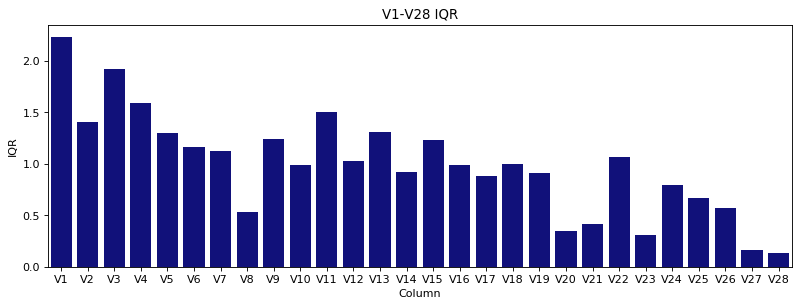

In [52]:
# Plot IQR

plt.figure(figsize=(12,4), dpi=80)
sb.barplot(x=PCA_vars, y=df[PCA_vars].quantile(0.75) - df[PCA_vars].quantile(0.25), color='darkblue')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQR')


In [76]:
#Random Undersampling
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
223197,-0.919911,1.521083,-0.774145,-0.449930,0.815685,-0.780079,0.755754,0.235872,-0.038001,-1.205981,...,0.371808,-0.367725,-0.687640,0.016328,0.624137,0.397003,0.220389,0,-0.028086,0.688342
150666,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,-15.239962,...,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,1,0.782505,0.107708
111385,-0.086831,1.572640,0.725673,2.805809,0.087597,-0.040972,0.191390,0.323440,-1.571965,0.634263,...,0.409000,0.140439,-0.099976,-1.266702,-0.031910,0.161140,0.197008,0,-0.307273,-0.146630
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1,0.286872,1.006309
189587,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,-4.565260,...,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,1,0.641375,0.514327


In [78]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


In [81]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [146]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
}

In [88]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 94.0 % accuracy score


In [127]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


In [140]:
grid_log_reg.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [91]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [100]:
tree_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [136]:
# RandomForest Classifier
# Create the parameter grid based on the results of random search 
random_param = {
    'bootstrap': [True, False],
    'max_depth': [2, 5, 1],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [7, 5, 1],
    'min_samples_split': [8, 5, 12]
}# Create a based model
grid_random = GridSearchCV(RandomForestClassifier(), random_param)
grid_random.fit(X_train, y_train)
random_clf = grid_random.best_estimator_

In [137]:
random_clf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.79%


In [93]:
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 91.99%


In [138]:
random_score = cross_val_score(random_clf, X_train, y_train, cv=5)
print('RandomScore Classifier Cross Validation Score', round(random_score.mean() * 100, 2).astype(str) + '%')

RandomScore Classifier Cross Validation Score 94.53%
